### PyTorch学习率调整策略
PyTorch中学习率调整策略通过 torch.optim.lr_scheduler 接口实现, 一共9种方法, 可分为三大类:

a. 有序调整:等间隔Step调整、指定多间隔MultiStep调整学习率、指数衰减调整Exponential、余弦退火CosineAnnealing

b. 自适应调整:自适应调整ReduceLROnPlateau

c. 自定义调整:自定义lamda调整LambdaLR

```
torch.optim.lr_scheduler.LambdaLR 自定义lamda函数
torch.optim.lr_scheduler.StepLR 等间隔阶梯下降
torch.optim.lr_scheduler.MultiStepLR 指定多间隔step_list阶梯下降
torch.optim.lr_scheduler.ExponentialLR 指数下降
torch.optim.lr_scheduler.CosineAnnealingLR 余弦退火
torch.optim.lr_scheduler.CosineAnnealingWarmRestarts 带热启动的余弦退火
torch.optim.lr_scheduler.CyclicLR 循环调整
torch.optim.lr_scheduler.OneCycleLR 第一次退火到大学习率
torch.optim.lr_scheduler.ReduceLROnPlateau 自适应下降
```

官网:https://pytorch.org/docs/master/search.html?q=lr_scheduler&check_keywords=yes&area=default

参考1:https://blog.csdn.net/junqing_wu/article/details/93248190

参考2:https://www.cnblogs.com/wanghui-garcia/p/10895397.html

In [ ]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision.models import AlexNet
import matplotlib.pyplot as plt

model = AlexNet(num_classes=2)
optimizer = optim.SGD(params=model.parameters(), lr=0.001)

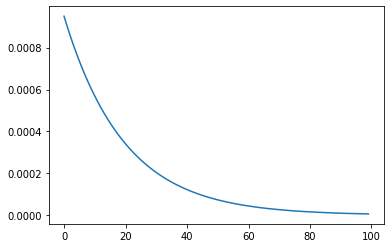

In [2]:
'''
 自定义lamda函数
 参数 lr_lambda 给定一个lambda函数, 将epoch作用于该函数, 生成scale*init_lr, 可以用来定义自己的lamda函数
'''
lambda1 = lambda epoch: epoch // 30 # epoch//30 * init_lr（0.05）
lambda2 = lambda epoch: 0.95 ** epoch 
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda= lambda2)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])   
plt.plot(x, y)

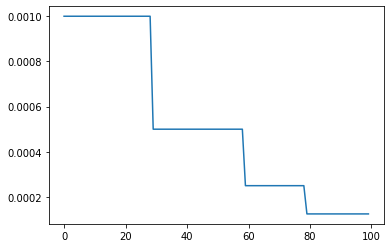

In [3]:
'''
 阶梯递降学习率
 StepLR:需要指定[step_size,gamma], step_size为下降频率, gamma为decay衰减系数
 MultiStepLR:则指定一个step_list, 每个指定的step则乘以gamma衰减系数, milestones=[30,60,80]
'''
# scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=[30,60,80],gamma= 0.5)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])
plt.plot(x, y)

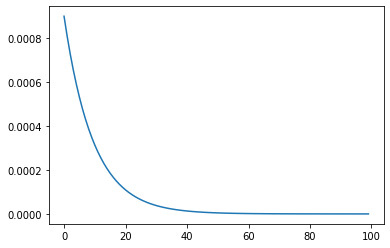

In [4]:
'''
 指数衰减学习率
 gamma是衰减系数, 越大衰减的越慢
'''
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])
plt.plot(x, y)

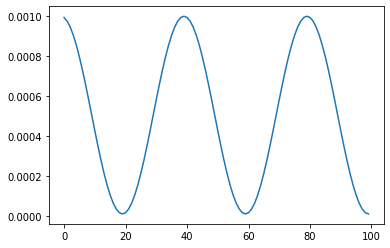

In [5]:
'''
 余弦退火
 T_max: 每次cosine的epoch数, 既cos函数周期
 eta_min: 每个周期衰减的最小学习率, 一般设置为1e-5之类的小学习率
 注意, 这只实现了SGDR的余弦退火部分, 而没有重新启动。
'''
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min = 1e-5)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])
plt.plot(x, y)

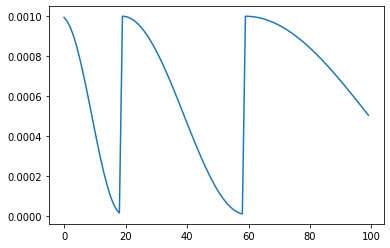

In [6]:
'''
 带热启动的余弦退火
 T_0:第一次重启的迭代次数
 T_mult:增大周期
'''
scheduler = lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=20, T_mult=2, eta_min = 1e-5)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])
plt.plot(x, y)

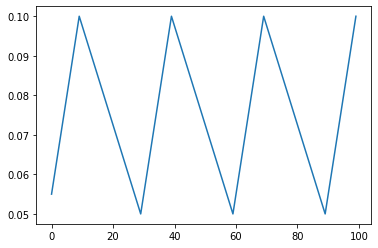

In [7]:
'''
 循环学习率,以恒定的频率循环两个边界之间的学习率
'''
scheduler = lr_scheduler.CyclicLR(optimizer,base_lr=0.05,max_lr=0.1,step_size_up=10,step_size_down=20)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])

plt.plot(x, y)

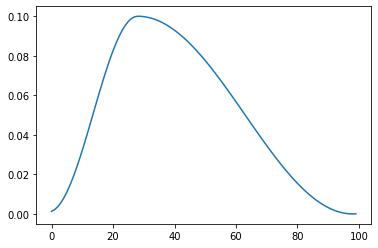

In [8]:
'''
 第一次退火到大学习率
 将学习率从一个初始学习率退火到一个最大学习率, 然后从这个最大学习率退火到一个比初始学习率低很多的最小学习率。
'''
scheduler = lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=10, epochs=10)
# (optimizer, max_lr=0.01, steps_per_epoch=len(data_loader), epochs=10)

plt.figure()
x = list(range(100))
y = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lr = scheduler.get_lr()
    y.append(scheduler.get_lr()[0])

plt.plot(x, y)

tensor(0.6010, grad_fn=<NllLossBackward>)
epoch 0 ,lr 10
tensor(229.9586, grad_fn=<NllLossBackward>)
epoch 1 ,lr 10
tensor(39.6332, grad_fn=<NllLossBackward>)
epoch 2 ,lr 10
tensor(0.0642, grad_fn=<NllLossBackward>)
epoch 3 ,lr 10
tensor(0.0395, grad_fn=<NllLossBackward>)
epoch 4 ,lr 10
tensor(2.9802e-06, grad_fn=<NllLossBackward>)
epoch 5 ,lr 10
tensor(2.9802e-06, grad_fn=<NllLossBackward>)
epoch 6 ,lr 10
tensor(2.9802e-06, grad_fn=<NllLossBackward>)
epoch 7 ,lr 10
tensor(2.9802e-06, grad_fn=<NllLossBackward>)
epoch 8 ,lr 10
tensor(2.9802e-06, grad_fn=<NllLossBackward>)
epoch 9 ,lr 1.0
tensor(2.9802e-06, grad_fn=<NllLossBackward>)
epoch 10 ,lr 1.0
tensor(2.9802e-06, grad_fn=<NllLossBackward>)
epoch 11 ,lr 1.0
tensor(2.9802e-06, grad_fn=<NllLossBackward>)
epoch 12 ,lr 1.0
tensor(2.9802e-06, grad_fn=<NllLossBackward>)
epoch 13 ,lr 0.1
tensor(2.9802e-06, grad_fn=<NllLossBackward>)
epoch 14 ,lr 0.1
tensor(2.9802e-06, grad_fn=<NllLossBackward>)
epoch 15 ,lr 0.1
tensor(2.9802e-06, grad_fn=<

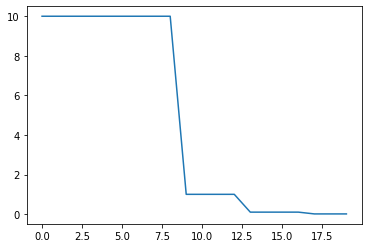

In [10]:
'''
 自适应下降,当loss不减时降低学习率
 这个调度器读取一个指标数量, 如果没有看到“容忍间隔”时间内的改善, 学习率就会降低
 factor:衰减因子
 patience:容忍epoch间隔, 当patience个epoch损失没有改进时使学习率会降低。
'''
import torchvision.models as models
import torch.nn as nn
model = models.resnet18(pretrained=False)
fc_features = model.fc.in_features
model.fc = nn.Linear(fc_features, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params = model.parameters(), lr=10)

scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, patience=3)

inputs = torch.randn(4,3,224,224)
labels = torch.LongTensor([1,1,0,1])
plt.figure()
x = list(range(20))
y = []
for epoch in range(20):
    optimizer.zero_grad()
    outputs = model(inputs)
    #print(outputs)
    loss = criterion(outputs, labels)
    print(loss)
    loss.backward()
    scheduler.step(loss) # 传入loss
    optimizer.step()    
    lr = optimizer.param_groups[0]['lr'] # ReduceLROnPlateau里没有scheduler.get_lr()
    print('epoch',epoch,',lr',lr)
    y.append(lr)
plt.plot(x,y)